## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2 * (x / 255) -1.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)               

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 8s 41ms/step - loss: 1.6829 - accuracy: 0.4010 - val_loss: 1.5394 - val_accuracy: 0.4607
Epoch 2/100
196/196 [==============================] - 7s 34ms/step - loss: 1.4628 - accuracy: 0.4834 - val_loss: 1.4546 - val_accuracy: 0.4841
Epoch 3/100
196/196 [==============================] - 7s 35ms/step - loss: 1.3437 - accuracy: 0.5263 - val_loss: 1.4033 - val_accuracy: 0.5105
Epoch 4/100
196/196 [==============================] - 7s 35ms/step - loss: 1.2446 - accuracy: 0.5603 - val_loss: 1.3833 - val_accuracy: 0.5174
Epoch 5/100
196/196 [==============================] - 7s 35ms/step - loss: 1.1627 - accuracy: 0.5880 - val_loss: 1.3684 - val_accuracy: 0.5243
Epoch 6/100
196/196 [==============================] - 7s 35ms/step - loss: 1.0876 - accuracy: 0.6152 - val_loss: 1.3556 - val_accuracy: 0.5300
Epoch 7/100
196/196 [==============================] - 7s 37ms/step - loss: 1.0118 - accuracy: 0.6433 - val_loss: 1.4245 - val_accuracy:

196/196 [==============================] - 7s 38ms/step - loss: 0.1272 - accuracy: 0.9577 - val_loss: 3.7394 - val_accuracy: 0.5301
Epoch 58/100
196/196 [==============================] - 8s 38ms/step - loss: 0.1096 - accuracy: 0.9637 - val_loss: 4.1361 - val_accuracy: 0.5244
Epoch 59/100
196/196 [==============================] - 7s 37ms/step - loss: 0.1009 - accuracy: 0.9667 - val_loss: 3.8989 - val_accuracy: 0.5348
Epoch 60/100
196/196 [==============================] - 7s 37ms/step - loss: 0.1072 - accuracy: 0.9648 - val_loss: 3.8781 - val_accuracy: 0.5268
Epoch 61/100
196/196 [==============================] - 8s 39ms/step - loss: 0.0757 - accuracy: 0.9754 - val_loss: 4.1179 - val_accuracy: 0.5213
Epoch 62/100
196/196 [==============================] - 8s 39ms/step - loss: 0.1004 - accuracy: 0.9666 - val_loss: 3.9562 - val_accuracy: 0.5302
Epoch 63/100
196/196 [==============================] - 7s 38ms/step - loss: 0.0917 - accuracy: 0.9696 - val_loss: 4.1243 - val_accuracy: 0.527

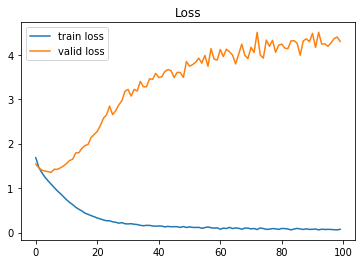

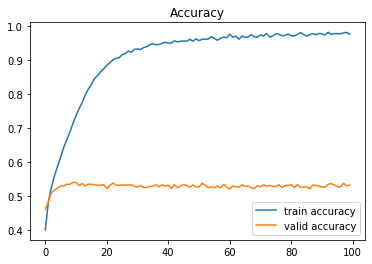

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()